In [1]:
import pandas as pd
import numpy as np
import xarray as xr
import pycountry
import rasterio
import geopandas as gpd
import rasterio.mask
from rasterstats import zonal_stats

import matplotlib.pyplot as plt
import shapely 

countries = [ 
    "AT", "BE", "BG", "CZ", "DE", "FR", "GB", "HR", 
    "HU", "IE", "LU", "NL", "PL", "RO", "SI", "SK",
]
idx = pd.IndexSlice

%matplotlib inline

In [2]:
europe_shape = gpd.read_file('/cluster/work/cpesm/brynmorp/euro-spores/land-eligibility/build/national/units.geojson')

In [4]:
when2heat_shape = europe_shape.set_index('id').loc[[pycountry.countries.lookup(i).alpha_3 for i in countries]]

In [6]:
when2heat_shape.total_bounds

array([-10.66269,  41.23593,  29.71677,  60.84589])

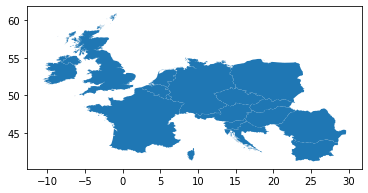

In [7]:
when2heat_shape.plot()

In [2]:
sonnendach = gpd.read_file('/cluster/work/cpesm/brynmorp/euro-spores/land-eligibility/data/sonnendach/SOLKAT_20180827.gdb')

In [6]:
sonnendach.columns#head().plot()

Index(['DF_UID', 'DF_NUMMER', 'DATUM_ERSTELLUNG', 'DATUM_AENDERUNG', 'SB_UUID',
       'SB_OBJEKTART', 'SB_DATUM_ERSTELLUNG', 'SB_DATUM_AENDERUNG', 'KLASSE',
       'FLAECHE', 'AUSRICHTUNG', 'NEIGUNG', 'MSTRAHLUNG', 'GSTRAHLUNG',
       'STROMERTRAG', 'WAERMEERTRAG', 'DUSCHGAENGE', 'DG_HEIZUNG',
       'DG_WAERMEBEDARF', 'BEDARF_WARMWASSER', 'BEDARF_HEIZUNG',
       'FLAECHE_KOLLEKTOREN', 'VOLUMEN_SPEICHER', 'GWR_EGID', 'SHAPE_Length',
       'SHAPE_Area', 'geometry'],
      dtype='object')

In [13]:
sonnendach.head()[['KLASSE',
'FLAECHE',
'AUSRICHTUNG',
'NEIGUNG',
'MSTRAHLUNG',
'GSTRAHLUNG',
'FLAECHE_KOLLEKTOREN',
'WAERMEERTRAG']]

,KLASSE,FLAECHE,AUSRICHTUNG,NEIGUNG,MSTRAHLUNG,GSTRAHLUNG,FLAECHE_KOLLEKTOREN,WAERMEERTRAG
0,4,15.948816,10,37,1320,21052,0.0,0
1,1,13.730555,-170,44,593,8142,0.0,0
2,3,63.437476,-80,12,1146,72699,0.0,0
3,3,38.368910,-80,33,1128,43280,0.0,0
4,1,36.403273,100,35,721,26247,0.0,0


In [4]:
sonnendach_wgs84= sonnendach.to_crs('epsg:4326')

In [ ]:
sonnendach_df = sonnendach.drop(columns='geometry')
sonnendach_df['lon'] = sonnendach_wgs84.centroid.x
sonnendach_df['lat'] = sonnendach_wgs84.centroid.y